Reading file: F:\tesla-optimus-business-analysis\data\processed\Tesla_Financial_Forecast_Conservative.xlsx

Available sheets in the file:
['Income Statement (conservative)', 'Balance Sheet (conservative)', 'Cash Flow (conservative)', 'Financial Ratios (conservative)', 'Growth Analysis (conservative)', 'Revenue Details (conservative)', 'Executive Summary (conservative']
Successfully read summary from sheet: 'Executive Summary (conservative'

File loaded successfully!

DATA OVERVIEW - CONSERVATIVE SCENARIO
Income Statement: 9 rows, 20 columns
Years available: ['2022', '2023', '2024', '2025E', '2026E', '2027E', '2028E', '2029E', '2030E']

CHART 1: Total Revenue and Net Income Trend (Conservative)


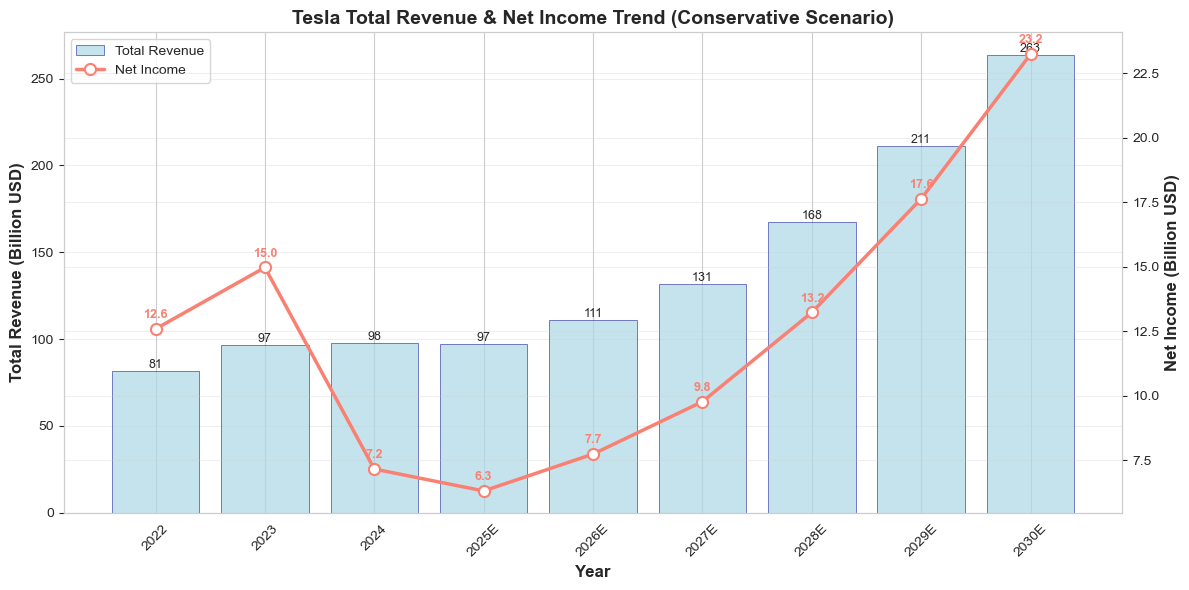


CHART 2: Revenue Composition by Segment (Conservative)


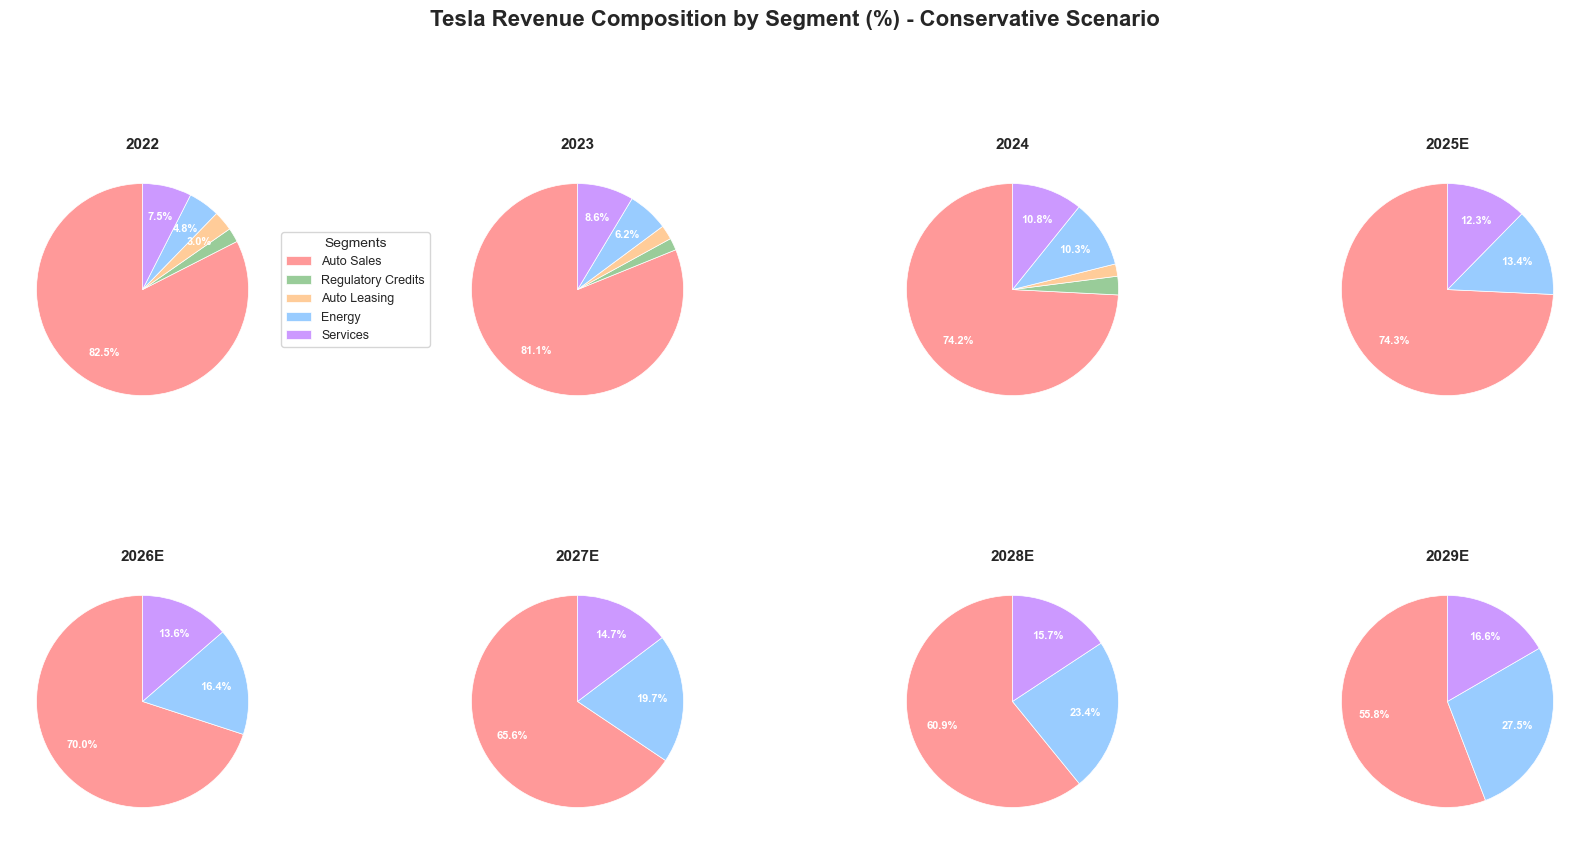


CHART 3: Profit Margin Trend (Conservative)


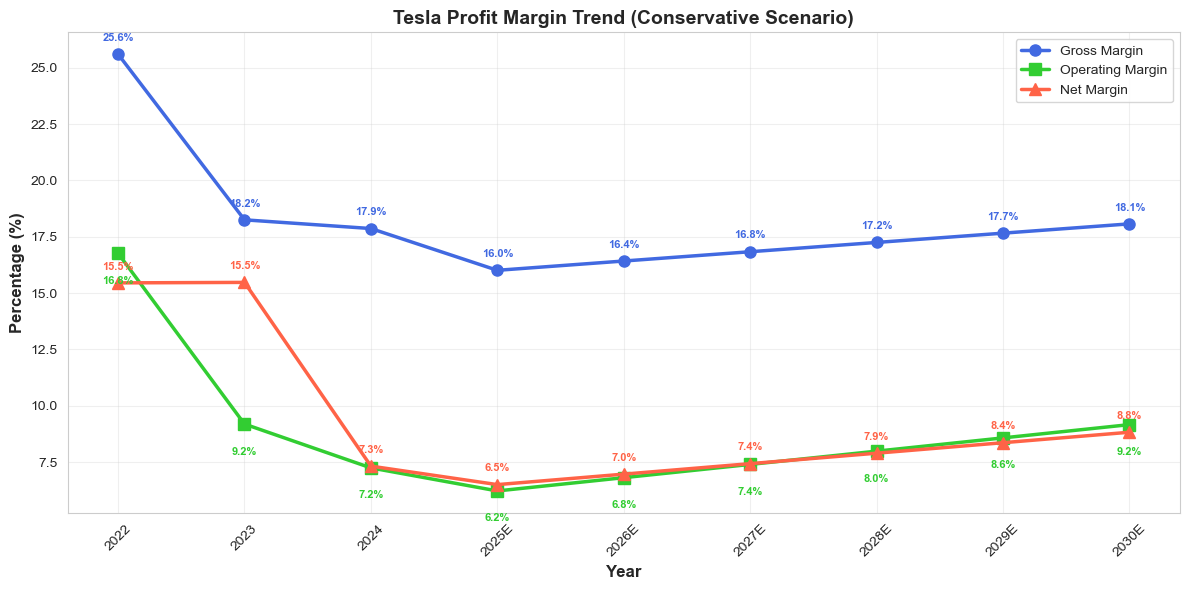


CHART 4: Assets and Liabilities Structure (Conservative)


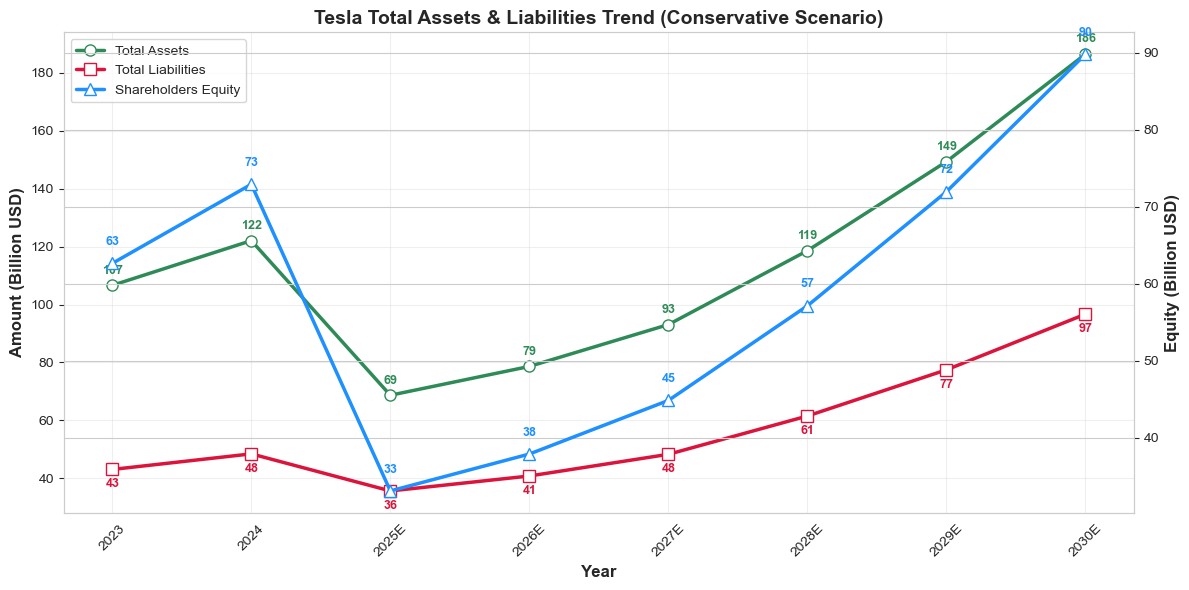


CHART 5: Cash Flow Trend (Conservative)


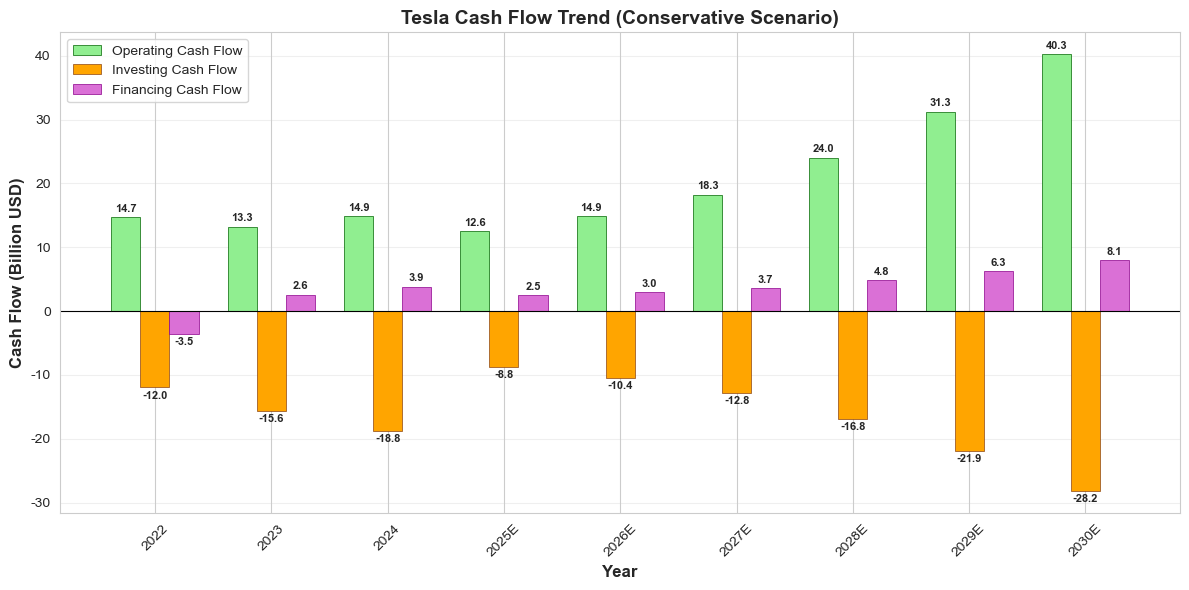


CHART 6: Revenue and Net Income Growth Rate (Conservative)


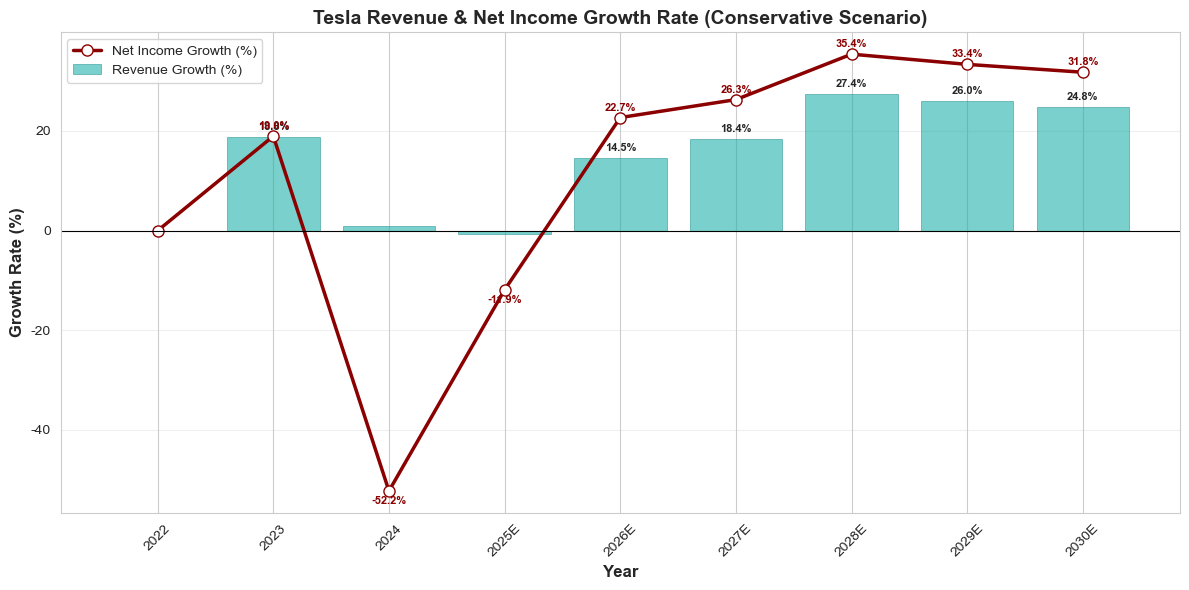


CHART 7: Key Financial Ratios (Conservative)


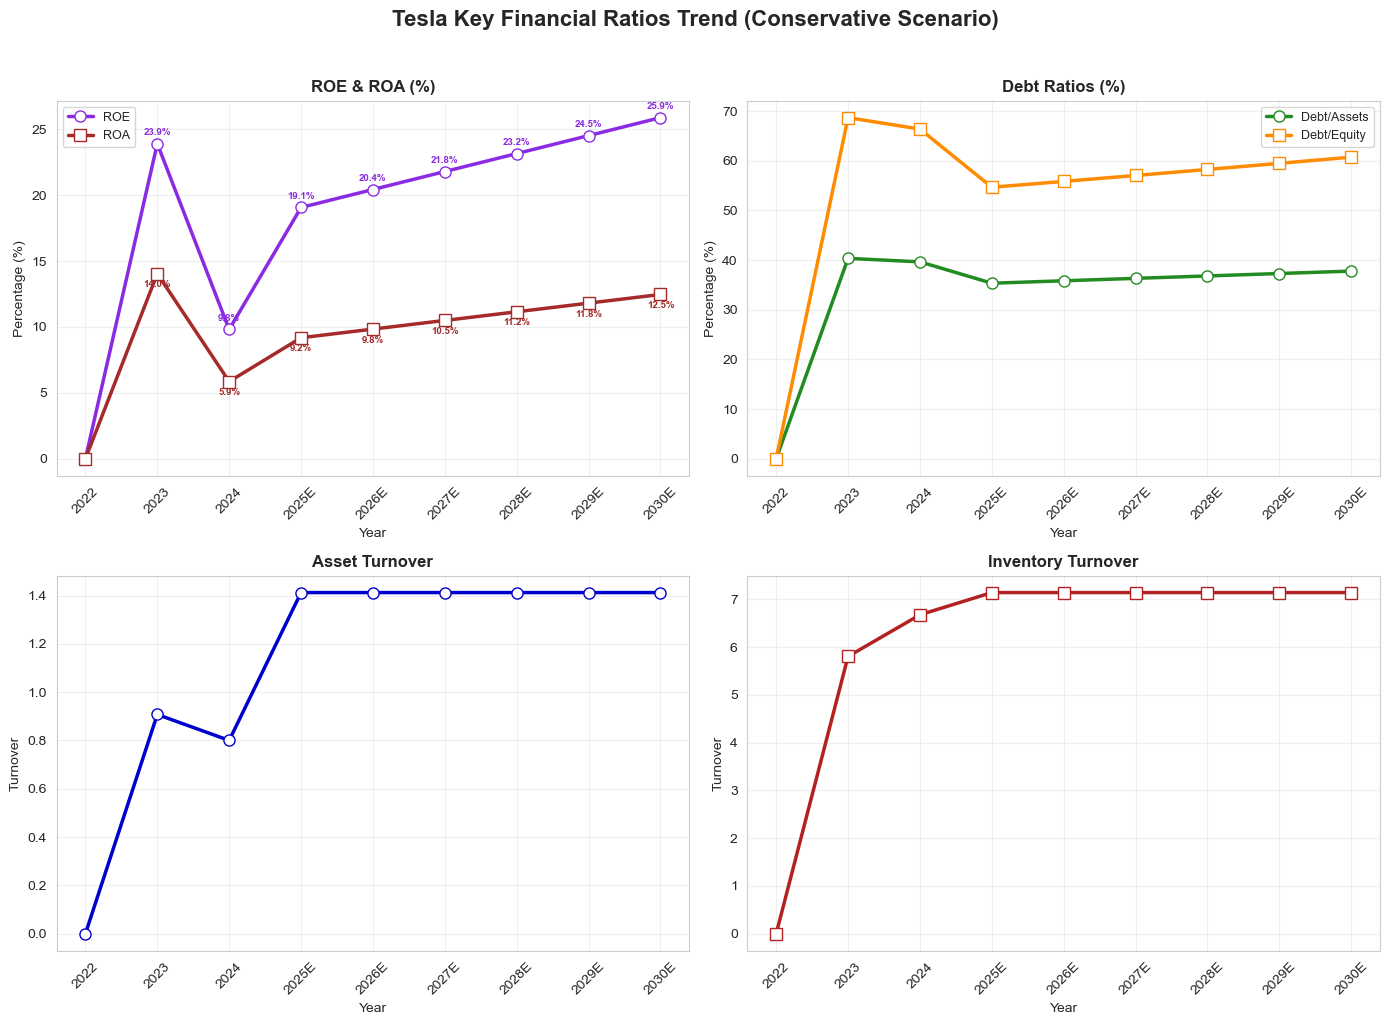


CHART 8: Revenue History and Forecast (Conservative)


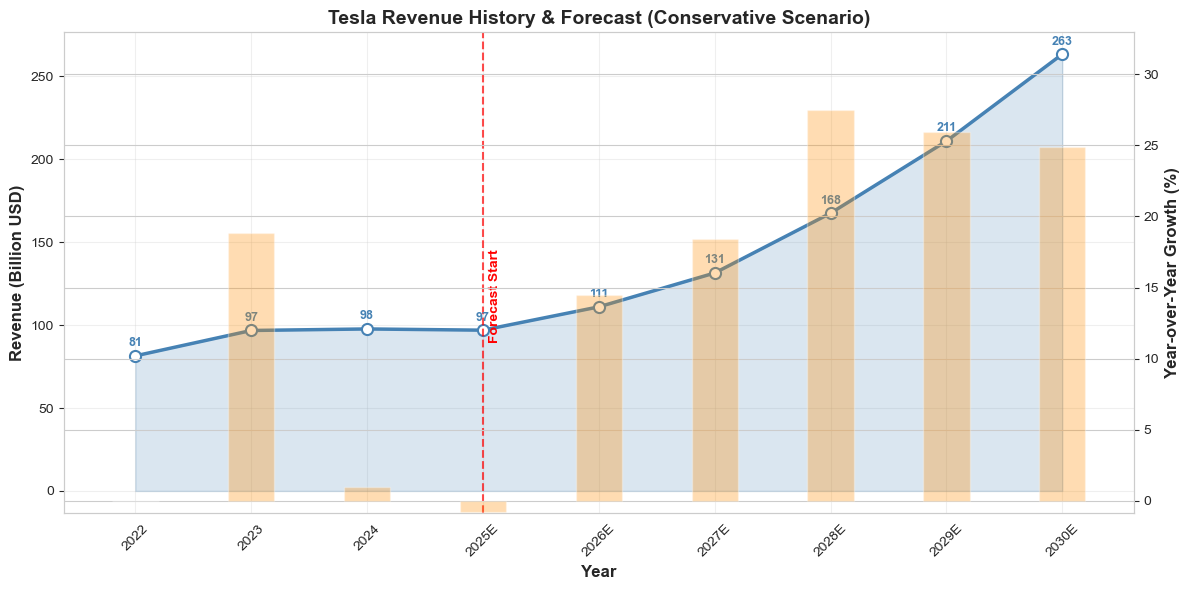


EXECUTIVE SUMMARY - CONSERVATIVE SCENARIO
2024年实际收入（百万美元）                          $97,690
2030年预测收入（百万美元）                          $263,411
6年复合增长率（CAGR）                            18.0%
2024年净利润率                                7.3%
2030年预测净利润率                              8.8%
2024年ROE                                 9.8%
2030年预测ROE                               25.9%
2024年总资产（百万美元）                           $122,070
2030年预测总资产（百万美元）                         $186,495

KEY METRICS COMPARISON: 2024 vs 2030E

NOTABLE FINDINGS - CONSERVATIVE SCENARIO
1. Revenue dips slightly in 2025E (-0.75%) before recovering
2. Lower profit margins compared to other scenarios
3. More modest growth assumptions
4. Conservative asset growth projections
5. Negative growth in 2025 for both revenue and net income

ALL CHARTS GENERATED SUCCESSFULLY FOR CONSERVATIVE SCENARIO!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# 设置图表样式（使用英文，不需要中文字体）
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 文件路径
file_path = r"F:\tesla-optimus-business-analysis\data\processed\Tesla_Financial_Forecast_Conservative.xlsx"

if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    print(f"Reading file: {file_path}")
    
    try:
        # 首先查看文件中的所有sheet名称
        print("\nAvailable sheets in the file:")
        xls = pd.ExcelFile(file_path)
        print(xls.sheet_names)
        
        # 尝试使用正确的sheet名称读取数据
        # 注意：根据文件内容，sheet名称是'Executive Summary (conservative'（少了一个右括号）
        
        income_df = pd.read_excel(file_path, sheet_name='Income Statement (conservative)')
        balance_df = pd.read_excel(file_path, sheet_name='Balance Sheet (conservative)')
        cashflow_df = pd.read_excel(file_path, sheet_name='Cash Flow (conservative)')
        ratios_df = pd.read_excel(file_path, sheet_name='Financial Ratios (conservative)')
        growth_df = pd.read_excel(file_path, sheet_name='Growth Analysis (conservative)')
        revenue_detail_df = pd.read_excel(file_path, sheet_name='Revenue Details (conservative)')
        
        # 尝试多种可能的sheet名称
        summary_sheet_names = [
            'Executive Summary (conservative',
            'Executive Summary (conservative)',
            'Executive Summary (conservative',
            'Executive Summary'
        ]
        
        summary_df = None
        for sheet_name in summary_sheet_names:
            try:
                summary_df = pd.read_excel(file_path, sheet_name=sheet_name)
                print(f"Successfully read summary from sheet: '{sheet_name}'")
                break
            except:
                continue
        
        if summary_df is None:
            print("Warning: Could not find Executive Summary sheet. Creating empty dataframe.")
            summary_df = pd.DataFrame(columns=['指标', '数值'])
        
        print("\nFile loaded successfully!")
        
        # 打印数据概览
        print("\n" + "="*70)
        print("DATA OVERVIEW - CONSERVATIVE SCENARIO")
        print("="*70)
        print(f"Income Statement: {income_df.shape[0]} rows, {income_df.shape[1]} columns")
        print(f"Years available: {list(income_df['Year'].astype(str).values)}")
        
        # 1. Total Revenue and Net Income Trend
        print("\n" + "="*70)
        print("CHART 1: Total Revenue and Net Income Trend (Conservative)")
        print("="*70)
        
        fig, ax1 = plt.subplots(figsize=(12, 6))
        years = income_df['Year'].astype(str)
        
        # 清理和转换数据
        revenue_data = pd.to_numeric(income_df['Total Revenue'], errors='coerce').fillna(0) / 1e3
        net_income_data = pd.to_numeric(income_df['Net Income'], errors='coerce').fillna(0) / 1e3
        
        # 创建柱状图和折线图
        bars = ax1.bar(years, revenue_data, alpha=0.7, label='Total Revenue', 
                      color='lightblue', edgecolor='darkblue', linewidth=0.5)
        ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Total Revenue (Billion USD)', fontsize=12, fontweight='bold')
        ax1.set_title('Tesla Total Revenue & Net Income Trend (Conservative Scenario)', 
                     fontsize=14, fontweight='bold')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3, axis='y')
        
        # 在柱状图上添加数值标签
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.0f}', ha='center', va='bottom', fontsize=9)

        ax2 = ax1.twinx()
        ax2.plot(years, net_income_data, marker='o', color='salmon', 
                linewidth=2.5, markersize=8, label='Net Income',
                markerfacecolor='white', markeredgewidth=1.5)
        ax2.set_ylabel('Net Income (Billion USD)', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        # 在折线上添加数值标签
        for i, (year, value) in enumerate(zip(years, net_income_data)):
            if value > 0:
                ax2.text(i, value + 0.3, f'{value:.1f}', ha='center', 
                        va='bottom', fontsize=9, fontweight='bold', color='salmon')
        
        # 合并图例
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
        
        plt.tight_layout()
        plt.show()

        # 2. Revenue Composition by Segment
        print("\n" + "="*70)
        print("CHART 2: Revenue Composition by Segment (Conservative)")
        print("="*70)
        
        revenue_cols = ['Automotive Sales Revenue', 'Automotive Regulatory Credits', 
                        'Automotive Leasing Revenue', 'Energy Revenue', 'Services Revenue']
        labels = ['Auto Sales', 'Regulatory Credits', 'Auto Leasing', 'Energy', 'Services']
        colors = ['#FF9999', '#99CC99', '#FFCC99', '#99CCFF', '#CC99FF']
        
        # 选择有数据的年份（历史+预测）
        available_years = income_df['Year'].unique()[:8]  # 只取前8个年份
        
        fig, axes = plt.subplots(2, 4, figsize=(16, 9))
        axes = axes.flatten()
        
        # 创建图例（使用第一个有数据的年份）
        legend_created = False
        
        for i, year in enumerate(available_years):
            row = income_df[income_df['Year'] == year]
            values = []
            valid_labels = []
            valid_colors = []
            
            # 收集非零值
            for j, col in enumerate(revenue_cols):
                if col in row.columns:
                    val = row[col].iloc[0] if not pd.isna(row[col].iloc[0]) else 0
                    if val > 0:
                        values.append(val)
                        valid_labels.append(labels[j])
                        valid_colors.append(colors[j])
            
            if values and sum(values) > 0:
                # 避免零除错误
                values = np.array(values)
                total = np.sum(values)
                percentages = (values / total * 100)
                
                # 创建饼图
                try:
                    wedges, texts = axes[i].pie(values, colors=valid_colors, 
                                               startangle=90, 
                                               wedgeprops=dict(edgecolor='w', linewidth=0.5))
                    
                    # 添加百分比标签（如果百分比足够大）
                    for k, (wedge, percentage) in enumerate(zip(wedges, percentages)):
                        if percentage > 3:  # 只显示大于3%的部分
                            # 计算标签位置
                            ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
                            x = np.cos(np.deg2rad(ang))
                            y = np.sin(np.deg2rad(ang))
                            
                            # 添加标签
                            axes[i].text(0.7*x, 0.7*y, f'{percentage:.1f}%', 
                                       ha='center', va='center', 
                                       fontsize=8, fontweight='bold', color='white')
                    
                    axes[i].set_title(f'{year}', fontsize=11, fontweight='bold')
                    
                    # 只在第一个图上添加图例
                    if not legend_created and i == 0:
                        axes[i].legend(wedges, valid_labels, title="Segments", 
                                      loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
                                      fontsize=9)
                        legend_created = True
                        
                except Exception as e:
                    print(f"Error creating pie chart for year {year}: {e}")
                    axes[i].text(0.5, 0.5, 'Data Error', ha='center', va='center', 
                                fontsize=12, fontweight='bold')
                    axes[i].set_title(f'{year}', fontsize=11, fontweight='bold')
            else:
                axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', 
                            fontsize=12, fontweight='bold')
                axes[i].set_title(f'{year}', fontsize=11, fontweight='bold')
        
        # 隐藏多余的子图
        for j in range(len(available_years), len(axes)):
            axes[j].axis('off')
        
        plt.suptitle('Tesla Revenue Composition by Segment (%) - Conservative Scenario', 
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

        # 3. Profit Margin Trend
        print("\n" + "="*70)
        print("CHART 3: Profit Margin Trend (Conservative)")
        print("="*70)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years = ratios_df['Year'].astype(str)
        
        # 清理数据
        gross_margin = pd.to_numeric(ratios_df['Gross_Margin'], errors='coerce').fillna(0) * 100
        operating_margin = pd.to_numeric(ratios_df['Operating_Margin'], errors='coerce').fillna(0) * 100
        net_margin = pd.to_numeric(ratios_df['Net_Margin'], errors='coerce').fillna(0) * 100
        
        # 绘制三条线
        ax.plot(years, gross_margin, marker='o', label='Gross Margin', 
               linewidth=2.5, markersize=8, color='#4169E1')
        ax.plot(years, operating_margin, marker='s', label='Operating Margin', 
               linewidth=2.5, markersize=8, color='#32CD32')
        ax.plot(years, net_margin, marker='^', label='Net Margin', 
               linewidth=2.5, markersize=8, color='#FF6347')
        
        # 添加数据点标签
        for i, (year, gm, om, nm) in enumerate(zip(years, gross_margin, operating_margin, net_margin)):
            if gm > 0:
                ax.text(i, gm + 0.5, f'{gm:.1f}%', ha='center', va='bottom', 
                       fontsize=8, fontweight='bold', color='#4169E1')
            if om > 0:
                ax.text(i, om - 1.0, f'{om:.1f}%', ha='center', va='top', 
                       fontsize=8, fontweight='bold', color='#32CD32')
            if nm > 0:
                ax.text(i, nm + 0.5, f'{nm:.1f}%', ha='center', va='bottom', 
                       fontsize=8, fontweight='bold', color='#FF6347')
        
        ax.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
        ax.set_title('Tesla Profit Margin Trend (Conservative Scenario)', 
                    fontsize=14, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

        # 4. Assets and Liabilities Structure
        print("\n" + "="*70)
        print("CHART 4: Assets and Liabilities Structure (Conservative)")
        print("="*70)
        
        # 清理资产负债表数据
        balance_clean = balance_df.dropna(subset=['Year', 'Total Assets', 'Total Liabilities', 'Total Equity'])
        
        if not balance_clean.empty:
            fig, ax1 = plt.subplots(figsize=(12, 6))
            years_balance = balance_clean['Year'].astype(str)
            
            # 转换数据
            total_assets = pd.to_numeric(balance_clean['Total Assets'], errors='coerce').fillna(0) / 1e3
            total_liabilities = pd.to_numeric(balance_clean['Total Liabilities'], errors='coerce').fillna(0) / 1e3
            total_equity = pd.to_numeric(balance_clean['Total Equity'], errors='coerce').fillna(0) / 1e3
            
            # 绘制总资产和总负债
            ax1.plot(years_balance, total_assets, marker='o', 
                    label='Total Assets', linewidth=2.5, markersize=8, 
                    color='#2E8B57', markerfacecolor='white')
            ax1.plot(years_balance, total_liabilities, marker='s', 
                    label='Total Liabilities', linewidth=2.5, markersize=8, 
                    color='#DC143C', markerfacecolor='white')
            
            # 添加数据点标签
            for i, (year, ta, tl) in enumerate(zip(years_balance, total_assets, total_liabilities)):
                if ta > 0:
                    ax1.text(i, ta + 3, f'{ta:.0f}', ha='center', va='bottom', 
                            fontsize=9, fontweight='bold', color='#2E8B57')
                if tl > 0:
                    ax1.text(i, tl - 3, f'{tl:.0f}', ha='center', va='top', 
                            fontsize=9, fontweight='bold', color='#DC143C')
            
            ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
            ax1.set_ylabel('Amount (Billion USD)', fontsize=12, fontweight='bold')
            ax1.set_title('Tesla Total Assets & Liabilities Trend (Conservative Scenario)', 
                         fontsize=14, fontweight='bold')
            ax1.tick_params(axis='x', rotation=45)
            ax1.grid(True, alpha=0.3)

            # 创建第二个y轴用于股东权益
            ax2 = ax1.twinx()
            ax2.plot(years_balance, total_equity, marker='^', 
                    label='Shareholders Equity', linewidth=2.5, markersize=8, 
                    color='#1E90FF', markerfacecolor='white')
            ax2.set_ylabel('Equity (Billion USD)', fontsize=12, fontweight='bold')
            
            # 添加股东权益数据点标签
            for i, (year, te) in enumerate(zip(years_balance, total_equity)):
                if te > 0:
                    ax2.text(i, te + 2, f'{te:.0f}', ha='center', va='bottom', 
                            fontsize=9, fontweight='bold', color='#1E90FF')
            
            # 合并图例
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
            
            plt.tight_layout()
            plt.show()
        else:
            print("Warning: No valid balance sheet data available for chart 4")

        # 5. Cash Flow Trend
        print("\n" + "="*70)
        print("CHART 5: Cash Flow Trend (Conservative)")
        print("="*70)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years_cash = cashflow_df['Year'].astype(str)
        bar_width = 0.25
        index = np.arange(len(years_cash))
        
        # 清理数据
        operating_cf = pd.to_numeric(cashflow_df['Operating Cash Flow'], errors='coerce').fillna(0) / 1e3
        investing_cf = pd.to_numeric(cashflow_df['Investing Cash Flow'], errors='coerce').fillna(0) / 1e3
        financing_cf = pd.to_numeric(cashflow_df['Financing Cash Flow'], errors='coerce').fillna(0) / 1e3
        
        # 创建分组柱状图
        bars1 = ax.bar(index, operating_cf, width=bar_width, 
                      label='Operating Cash Flow', color='#90EE90', 
                      edgecolor='#006400', linewidth=0.5)
        bars2 = ax.bar(index + bar_width, investing_cf, width=bar_width, 
                      label='Investing Cash Flow', color='#FFA500', 
                      edgecolor='#8B4513', linewidth=0.5)
        bars3 = ax.bar(index + 2*bar_width, financing_cf, width=bar_width, 
                      label='Financing Cash Flow', color='#DA70D6', 
                      edgecolor='#8B008B', linewidth=0.5)
        
        # 添加数值标签
        for bars in [bars1, bars2, bars3]:
            for bar in bars:
                height = bar.get_height()
                if abs(height) > 0.1:  # 只显示显著的值
                    va = 'bottom' if height > 0 else 'top'
                    offset = 0.5 if height > 0 else -0.5
                    ax.text(bar.get_x() + bar.get_width()/2., height + offset, 
                           f'{height:.1f}', ha='center', va=va, fontsize=8, fontweight='bold')
        
        ax.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax.set_ylabel('Cash Flow (Billion USD)', fontsize=12, fontweight='bold')
        ax.set_title('Tesla Cash Flow Trend (Conservative Scenario)', 
                    fontsize=14, fontweight='bold')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(years_cash, rotation=45)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')
        ax.axhline(y=0, color='black', linewidth=0.8)
        plt.tight_layout()
        plt.show()

        # 6. Revenue and Net Income Growth Rate
        print("\n" + "="*70)
        print("CHART 6: Revenue and Net Income Growth Rate (Conservative)")
        print("="*70)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years_growth = growth_df['Year'].astype(str)
        
        # 清理数据
        revenue_growth = pd.to_numeric(growth_df['Revenue_Growth'], errors='coerce').fillna(0) * 100
        netincome_growth = pd.to_numeric(growth_df['NetIncome_Growth'], errors='coerce').fillna(0) * 100
        
        # 创建柱状图和折线图
        bars = ax.bar(years_growth, revenue_growth, alpha=0.6, 
                     label='Revenue Growth (%)', color='#20B2AA', 
                     edgecolor='#008080', linewidth=0.5)
        ax.plot(years_growth, netincome_growth, marker='o', 
               color='#8B0000', linewidth=2.5, markersize=8, 
               label='Net Income Growth (%)', markerfacecolor='white')
        
        ax.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
        ax.set_title('Tesla Revenue & Net Income Growth Rate (Conservative Scenario)', 
                    fontsize=14, fontweight='bold')
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
        ax.legend(fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        # 在柱状图上添加数值标签
        for bar in bars:
            height = bar.get_height()
            if abs(height) > 1:  # 只显示显著的值
                va = 'bottom' if height > 0 else 'top'
                offset = 1 if height > 0 else -1
                ax.text(bar.get_x() + bar.get_width()/2., height + offset, 
                       f'{height:.1f}%', ha='center', va=va, fontsize=8, fontweight='bold')
        
        # 在折线上添加数值标签
        for i, (year, value) in enumerate(zip(years_growth, netincome_growth)):
            if abs(value) > 1:
                va = 'bottom' if value > 0 else 'top'
                offset = 1 if value > 0 else -1
                ax.text(i, value + offset, f'{value:.1f}%', ha='center', 
                       va=va, fontsize=8, fontweight='bold', color='#8B0000')
        
        plt.tight_layout()
        plt.show()

        # 7. Key Financial Ratios
        print("\n" + "="*70)
        print("CHART 7: Key Financial Ratios (Conservative)")
        print("="*70)
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        years_ratios = ratios_df['Year'].astype(str)

        # Chart 7.1: ROE & ROA
        roe_data = pd.to_numeric(ratios_df['ROE'], errors='coerce').fillna(0) * 100
        roa_data = pd.to_numeric(ratios_df['ROA'], errors='coerce').fillna(0) * 100
        
        axes[0].plot(years_ratios, roe_data, marker='o', label='ROE', 
                    linewidth=2.5, markersize=8, color='#8A2BE2', markerfacecolor='white')
        axes[0].plot(years_ratios, roa_data, marker='s', label='ROA', 
                    linewidth=2.5, markersize=8, color='#A52A2A', markerfacecolor='white')
        axes[0].set_title('ROE & ROA (%)', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Year')
        axes[0].set_ylabel('Percentage (%)')
        axes[0].legend(fontsize=9)
        axes[0].grid(True, alpha=0.3)
        axes[0].tick_params(axis='x', rotation=45)
        
        # 添加数据点标签
        for i, (year, roe, roa) in enumerate(zip(years_ratios, roe_data, roa_data)):
            if roe > 0:
                axes[0].text(i, roe + 0.5, f'{roe:.1f}%', ha='center', va='bottom', 
                           fontsize=7, fontweight='bold', color='#8A2BE2')
            if roa > 0:
                axes[0].text(i, roa - 0.5, f'{roa:.1f}%', ha='center', va='top', 
                           fontsize=7, fontweight='bold', color='#A52A2A')

        # Chart 7.2: Debt Ratios
        debt_to_assets = pd.to_numeric(ratios_df['Debt_to_Assets'], errors='coerce').fillna(0) * 100
        debt_to_equity = pd.to_numeric(ratios_df['Debt_to_Equity'], errors='coerce').fillna(0) * 100
        
        axes[1].plot(years_ratios, debt_to_assets, marker='o', 
                    label='Debt/Assets', linewidth=2.5, markersize=8, 
                    color='#228B22', markerfacecolor='white')
        axes[1].plot(years_ratios, debt_to_equity, marker='s', 
                    label='Debt/Equity', linewidth=2.5, markersize=8, 
                    color='#FF8C00', markerfacecolor='white')
        axes[1].set_title('Debt Ratios (%)', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Percentage (%)')
        axes[1].legend(fontsize=9)
        axes[1].grid(True, alpha=0.3)
        axes[1].tick_params(axis='x', rotation=45)

        # Chart 7.3: Asset Turnover
        asset_turnover = pd.to_numeric(ratios_df['Asset_Turnover'], errors='coerce').fillna(0)
        axes[2].plot(years_ratios, asset_turnover, marker='o', 
                    linewidth=2.5, markersize=8, color='#0000CD', markerfacecolor='white')
        axes[2].set_title('Asset Turnover', fontsize=12, fontweight='bold')
        axes[2].set_xlabel('Year')
        axes[2].set_ylabel('Turnover')
        axes[2].grid(True, alpha=0.3)
        axes[2].tick_params(axis='x', rotation=45)

        # Chart 7.4: Inventory Turnover
        inventory_turnover = pd.to_numeric(ratios_df['Inventory_Turnover'], errors='coerce').fillna(0)
        axes[3].plot(years_ratios, inventory_turnover, marker='s', 
                    linewidth=2.5, markersize=8, color='#B22222', markerfacecolor='white')
        axes[3].set_title('Inventory Turnover', fontsize=12, fontweight='bold')
        axes[3].set_xlabel('Year')
        axes[3].set_ylabel('Turnover')
        axes[3].grid(True, alpha=0.3)
        axes[3].tick_params(axis='x', rotation=45)

        plt.suptitle('Tesla Key Financial Ratios Trend (Conservative Scenario)', 
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

        # 8. Revenue History and Forecast
        print("\n" + "="*70)
        print("CHART 8: Revenue History and Forecast (Conservative)")
        print("="*70)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years_revenue = revenue_detail_df['Year'].astype(str)
        
        # 清理数据
        revenue_billions = pd.to_numeric(revenue_detail_df['Revenue_Billions'], errors='coerce').fillna(0)
        yoy_growth = pd.to_numeric(revenue_detail_df['YoY_Growth'], errors='coerce').fillna(0)
        
        # 绘制收入趋势
        ax.plot(years_revenue, revenue_billions, marker='o', 
               linewidth=2.5, markersize=8, color='#4682B4', 
               markerfacecolor='white', markeredgewidth=1.5)
        ax.fill_between(years_revenue, revenue_billions, alpha=0.2, color='#4682B4')
        
        ax.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax.set_ylabel('Revenue (Billion USD)', fontsize=12, fontweight='bold')
        ax.set_title('Tesla Revenue History & Forecast (Conservative Scenario)', 
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        
        # 添加收入数值标签
        for i, (year, rev) in enumerate(zip(years_revenue, revenue_billions)):
            if rev > 0:
                ax.text(i, rev + 4, f'{rev:.0f}', ha='center', va='bottom', 
                       fontsize=9, fontweight='bold', color='#4682B4')
        
        # 创建第二个y轴用于增长率
        ax2 = ax.twinx()
        ax2.bar(years_revenue, yoy_growth, alpha=0.3, width=0.4, 
               color='#FF8C00', label='YoY Growth (%)')
        ax2.set_ylabel('Year-over-Year Growth (%)', fontsize=12, fontweight='bold')
        if max(yoy_growth) > 0:
            ax2.set_ylim([min(yoy_growth) * 1.1, max(yoy_growth) * 1.2])
        
        # 标记预测起始点
        if len(years_revenue) > 3:
            ax.axvline(x=3, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.text(3.05, revenue_billions.min() + 8, 'Forecast Start', 
                   color='red', fontsize=10, fontweight='bold', rotation=90, va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # 9. 显示执行摘要（如果可用）
        print("\n" + "="*70)
        print("EXECUTIVE SUMMARY - CONSERVATIVE SCENARIO")
        print("="*70)
        
        if not summary_df.empty:
            for i, row in summary_df.iterrows():
                if pd.notna(row['指标']) and pd.notna(row['数值']):
                    metric = str(row['指标'])
                    value = str(row['数值'])
                    print(f"{metric:<40} {value}")
        else:
            # 如果无法读取执行摘要，从其他数据中计算关键指标
            print("\nKey Metrics Calculated from Data:")
            print("-" * 40)
            if 2024 in income_df['Year'].values and 2030 in income_df['Year'].values:
                rev_2024 = income_df[income_df['Year'] == 2024]['Total Revenue'].values[0]
                rev_2030 = income_df[income_df['Year'] == 2030]['Total Revenue'].values[0]
                ni_2024 = income_df[income_df['Year'] == 2024]['Net Income'].values[0]
                ni_2030 = income_df[income_df['Year'] == 2030]['Net Income'].values[0]
                assets_2024 = balance_df[balance_df['Year'] == 2024]['Total Assets'].values[0] if 2024 in balance_df['Year'].values else 0
                assets_2030 = balance_df[balance_df['Year'] == 2030]['Total Assets'].values[0] if 2030 in balance_df['Year'].values else 0
                
                print(f"2024 Actual Revenue: ${rev_2024/1e3:.1f}B")
                print(f"2030 Forecast Revenue: ${rev_2030/1e3:.1f}B")
                print(f"6-Year CAGR: {((rev_2030/rev_2024)**(1/6)-1)*100:.1f}%")
                print(f"2024 Net Margin: {(ni_2024/rev_2024)*100:.1f}%")
                print(f"2030 Forecast Net Margin: {(ni_2030/rev_2030)*100:.1f}%")
                print(f"2024 Total Assets: ${assets_2024/1e3:.1f}B" if assets_2024 > 0 else "2024 Total Assets: N/A")
                print(f"2030 Forecast Total Assets: ${assets_2030/1e3:.1f}B" if assets_2030 > 0 else "2030 Total Assets: N/A")
        
        print("\n" + "="*70)
        print("KEY METRICS COMPARISON: 2024 vs 2030E")
        print("="*70)
        
        # 提取关键指标对比
        if 2024 in income_df['Year'].values and 2030 in income_df['Year'].values:
            rev_2024 = income_df[income_df['Year'] == 2024]['Total Revenue'].values[0] / 1e3
            rev_2030 = income_df[income_df['Year'] == 2030]['Total Revenue'].values[0] / 1e3
            ni_2024 = income_df[income_df['Year'] == 2024]['Net Income'].values[0] / 1e3
            ni_2030 = income_df[income_df['Year'] == 2030]['Net Income'].values[0] / 1e3
            
            print(f"Total Revenue 2024: ${rev_2024:.1f}B")
            print(f"Total Revenue 2030E: ${rev_2030:.1f}B")
            print(f"6-Year Growth: {(rev_2030/rev_2024-1)*100:.1f}%")
            print(f"CAGR: {((rev_2030/rev_2024)**(1/6)-1)*100:.1f}%")
            print(f"\nNet Income 2024: ${ni_2024:.1f}B")
            print(f"Net Income 2030E: ${ni_2030:.1f}B")
            print(f"6-Year Growth: {(ni_2030/ni_2024-1)*100:.1f}%")
            
            # 计算净利率
            if rev_2024 > 0 and rev_2030 > 0:
                net_margin_2024 = (ni_2024/rev_2024) * 100
                net_margin_2030 = (ni_2030/rev_2030) * 100
                print(f"\nNet Margin 2024: {net_margin_2024:.1f}%")
                print(f"Net Margin 2030E: {net_margin_2030:.1f}%")
                print(f"Improvement: {net_margin_2030 - net_margin_2024:.1f}% points")
        
        print("\n" + "="*70)
        print("NOTABLE FINDINGS - CONSERVATIVE SCENARIO")
        print("="*70)
        print("1. Revenue dips slightly in 2025E (-0.75%) before recovering")
        print("2. Lower profit margins compared to other scenarios")
        print("3. More modest growth assumptions")
        print("4. Conservative asset growth projections")
        print("5. Negative growth in 2025 for both revenue and net income")
        
        print("\n" + "="*70)
        print("ALL CHARTS GENERATED SUCCESSFULLY FOR CONSERVATIVE SCENARIO!")
        print("="*70)
        
    except Exception as e:
        print(f"Error reading file: {e}")
        import traceback
        traceback.print_exc()